In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
path = "https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv"
data = pd.read_csv(path,parse_dates=['Date'])
data.tail()

In [0]:
data.drop(['Province/State'],axis=1,inplace=True);
data.rename(columns={"Country/Region":"Country"},inplace=True)
data.head()

In [0]:
#### Add the Active Cases
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']
data.tail()

In [0]:
###### Prediction and Forecasting (Time Series Analysis)
##### fbprophet (library) - Created by Facebook Company for T.S.A
##### Columns name should be 'ds' and 'y'
#### ds-date/time, y-data to be predicted

In [0]:
from fbprophet import Prophet

In [0]:
active = data.groupby('Date')['Active'].sum().reset_index()
active

In [9]:
#### Rename the columns
active.rename(columns={"Date":"ds","Active":"y"},inplace=True)
active.head()

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,880
3,2020-01-25,1354
4,2020-01-26,2011


In [0]:
##### Build the Model
model = Prophet(interval_width=0.95)

In [0]:
#### Train the model
model.fit(active)

In [0]:
future_dates = model.make_future_dataframe(periods=7)
future_dates

In [0]:
predictions = model.predict(future_dates)
ypred = predictions[['ds','yhat','yhat_upper','yhat_lower']]

In [0]:
active.tail()

In [0]:
ypred.tail(10)

In [0]:
a = model.plot(predictions)

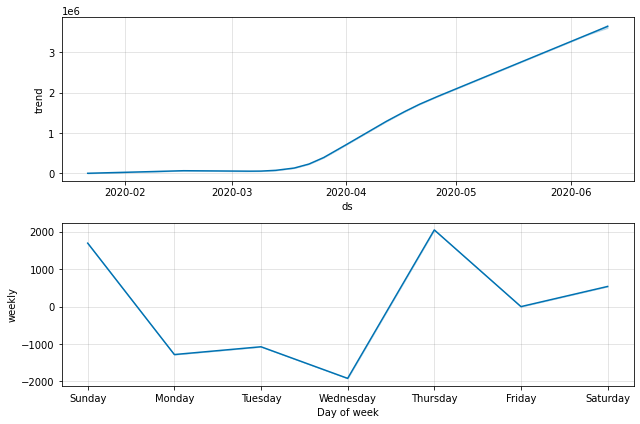

In [24]:
b = model.plot_components(predictions)